# Problem 1:

Construct a CNN to classify the images in the MRI dataset. 

As usual, I downsample the data set and then reshape it. I then build a CNN which I make more and more elaborate in successive stages.

In [ ]:
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('legend', fontsize=18)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

file_dir = 'C:/Users/burch/OneDrive/Documents/MRI_Slices/'

labels = pd.read_csv(file_dir + 'labels.csv')
display(labels)
y = labels.CDR

In [11]:
from matplotlib import pyplot as plt
import matplotlib

data = np.zeros([702, 36608])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

    
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(561,) (141,)


In [12]:
DS = 8             # Downsample rate, must be a factor of 36608

N_train = y_train.shape[0]  # The length of the training data
y_train = np.array(y_train)

if 36608/DS % 1 > 0:
    print("Downsample rate is not a multiple of 36608")
    DS = 1
    im_size = 36608
else:
    im_size = int(36608/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros([N_train*DS])
   
for n in range(N_train):
    for i in range(DS):
        Xds_train[n*DS+i,:] = X_train[n,i::DS]
        yds_train[n*DS+i] = y_train[n]

In [13]:
#testing data
y_test = np.matrix(y_test)

Xds_test = np.zeros([141*DS, im_size])
yds_test = np.zeros([141*DS])

for n in range(140):
    for i in range(DS):
        Xds_test[n*DS+i,:] = X_test[n,i::DS]
        yds_test[n*DS+i] = y_test[0,n]

print(Xds_test.shape)
print(yds_test.shape)

(1128, 4576)
(1128,)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Reshape the data
Xds_train = X_train.reshape((-1, 4576, 1, 1))
Xds_test = X_test.reshape((-1, 4576, 1, 1))
y_train = to_categorical(yds_train, num_classes=4)
y_test = to_categorical(yds_test, num_classes=4)

In [18]:
Xds_train.shape

(4488, 4576, 1, 1)

In [19]:
y_train.shape

(4488, 4)

In [32]:
X_train_small = Xds_train[:1000]
y_train_small = y_train[:1000]
X_test_small = Xds_test[:200]
y_test_small = y_test[:200]

Epoch 1/10
32/32 [==============================] - 5s 142ms/step - loss: 0.4867 - accuracy: 0.8670 - val_loss: 0.5691 - val_accuracy: 0.8400
Epoch 2/10
32/32 [==============================] - 5s 143ms/step - loss: 0.3912 - accuracy: 0.8960 - val_loss: 0.6066 - val_accuracy: 0.8400
Epoch 3/10
32/32 [==============================] - 5s 165ms/step - loss: 0.4015 - accuracy: 0.8960 - val_loss: 0.6260 - val_accuracy: 0.8400
Epoch 4/10
32/32 [==============================] - 5s 171ms/step - loss: 0.3898 - accuracy: 0.8960 - val_loss: 0.5422 - val_accuracy: 0.8400
Epoch 5/10
32/32 [==============================] - 5s 164ms/step - loss: 0.3796 - accuracy: 0.8960 - val_loss: 0.5628 - val_accuracy: 0.8400
Epoch 6/10
32/32 [==============================] - 5s 169ms/step - loss: 0.3879 - accuracy: 0.8960 - val_loss: 0.5696 - val_accuracy: 0.8400
Epoch 7/10
32/32 [==============================] - 6s 176ms/step - loss: 0.3699 - accuracy: 0.8960 - val_loss: 0.5551 - val_accuracy: 0.8400
Epoch 

(0.0, 1.0)

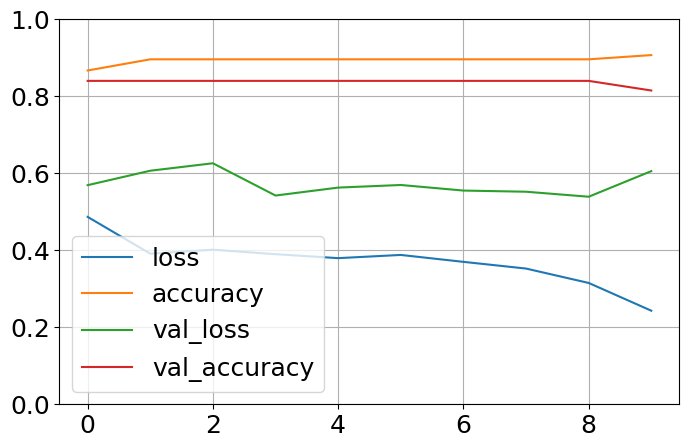

In [48]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=10,
                    validation_data=(X_test_small, y_test_small))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [49]:
model.fit(X_test_small, y_test_small)

7/7 [==============================] - 1s 109ms/step - loss: 0.5954 - accuracy: 0.8300


This is a huge improvement over the ANN built in Lab 4. It's much more accuracte, and doesn't appear to be overfitting.

Notice that training accuracy flatlined but then improved a little on the last epoch. Let's try adding a few more epochs.

Epoch 1/20
32/32 [==============================] - 5s 144ms/step - loss: 0.4235 - accuracy: 0.8820 - val_loss: 0.6560 - val_accuracy: 0.8400
Epoch 2/20
32/32 [==============================] - 4s 137ms/step - loss: 0.3911 - accuracy: 0.8960 - val_loss: 0.5378 - val_accuracy: 0.8400
Epoch 3/20
32/32 [==============================] - 5s 170ms/step - loss: 0.3843 - accuracy: 0.8960 - val_loss: 0.5536 - val_accuracy: 0.8400
Epoch 4/20
32/32 [==============================] - 5s 159ms/step - loss: 0.3804 - accuracy: 0.8960 - val_loss: 0.5503 - val_accuracy: 0.8400
Epoch 5/20
32/32 [==============================] - 5s 161ms/step - loss: 0.3669 - accuracy: 0.8960 - val_loss: 0.5610 - val_accuracy: 0.8400
Epoch 6/20
32/32 [==============================] - 6s 172ms/step - loss: 0.3568 - accuracy: 0.8960 - val_loss: 0.5883 - val_accuracy: 0.8400
Epoch 7/20
32/32 [==============================] - 5s 169ms/step - loss: 0.3311 - accuracy: 0.8960 - val_loss: 0.5633 - val_accuracy: 0.8400
Epoch 

(0.0, 1.0)

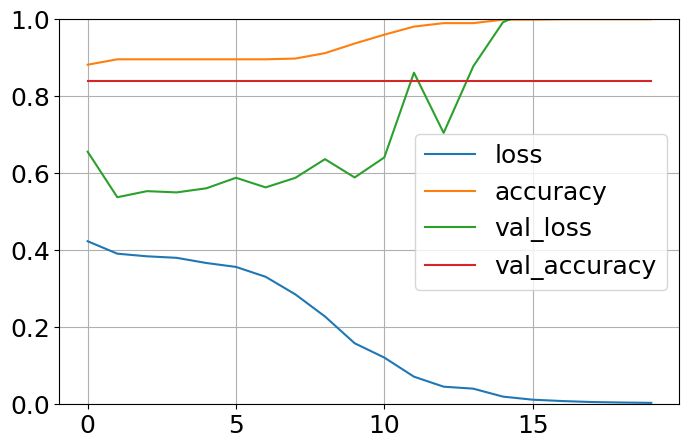

In [51]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=20,
                    validation_data=(X_test_small, y_test_small))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

In [52]:
model.evaluate(X_test_small, y_test_small)

7/7 [==============================] - 0s 36ms/step - loss: 1.2295 - accuracy: 0.8400


[1.2295470237731934, 0.8399999737739563]

So actually this resulted in overfitting. This is probably because the training data set is not large enough to justify 20 epochs. Let's enlarge it, then build a model on 10 epochs and then 20 epochs.

In [53]:
X_train_small = Xds_train[:2000]
y_train_small = y_train[:2000]
X_test_small = Xds_test[:400]
y_test_small = y_test[:400]

Epoch 1/10
32/32 [==============================] - 5s 138ms/step - loss: 0.4836 - accuracy: 0.8660 - val_loss: 0.5576 - val_accuracy: 0.8400
Epoch 2/10
32/32 [==============================] - 4s 130ms/step - loss: 0.4163 - accuracy: 0.8960 - val_loss: 0.5573 - val_accuracy: 0.8400
Epoch 3/10
32/32 [==============================] - 5s 167ms/step - loss: 0.3842 - accuracy: 0.8960 - val_loss: 0.5481 - val_accuracy: 0.8400
Epoch 4/10
32/32 [==============================] - 5s 165ms/step - loss: 0.3927 - accuracy: 0.8960 - val_loss: 0.5611 - val_accuracy: 0.8400
Epoch 5/10
32/32 [==============================] - 5s 156ms/step - loss: 0.3825 - accuracy: 0.8960 - val_loss: 0.6456 - val_accuracy: 0.8400
Epoch 6/10
32/32 [==============================] - 6s 175ms/step - loss: 0.3853 - accuracy: 0.8960 - val_loss: 0.5636 - val_accuracy: 0.8400
Epoch 7/10
32/32 [==============================] - 5s 161ms/step - loss: 0.3736 - accuracy: 0.8960 - val_loss: 0.6057 - val_accuracy: 0.8400
Epoch 

[0.5524687170982361, 0.8399999737739563]

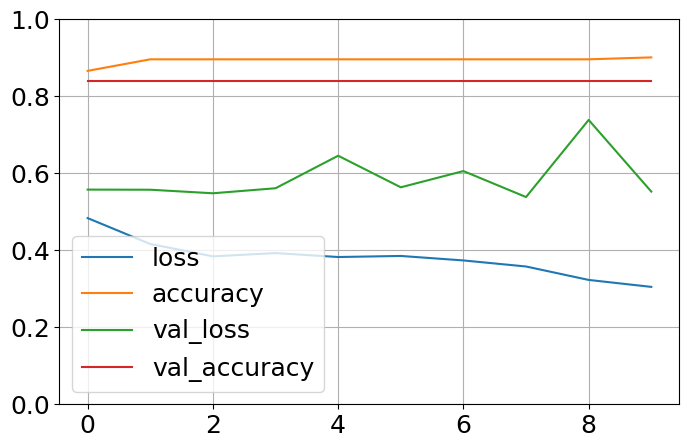

In [55]:
#10 epochs

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=10,
                    validation_data=(X_test_small, y_test_small))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

model.evaluate(X_test_small, y_test_small)

Epoch 1/20
32/32 [==============================] - 5s 139ms/step - loss: 0.4640 - accuracy: 0.8720 - val_loss: 0.5424 - val_accuracy: 0.8400
Epoch 2/20
32/32 [==============================] - 5s 142ms/step - loss: 0.3946 - accuracy: 0.8960 - val_loss: 0.5418 - val_accuracy: 0.8400
Epoch 3/20
32/32 [==============================] - 7s 227ms/step - loss: 0.3932 - accuracy: 0.8960 - val_loss: 0.5693 - val_accuracy: 0.8400
Epoch 4/20
32/32 [==============================] - 5s 162ms/step - loss: 0.3882 - accuracy: 0.8960 - val_loss: 0.5824 - val_accuracy: 0.8400
Epoch 5/20
32/32 [==============================] - 5s 162ms/step - loss: 0.3735 - accuracy: 0.8960 - val_loss: 0.5338 - val_accuracy: 0.8400
Epoch 6/20
32/32 [==============================] - 5s 157ms/step - loss: 0.3773 - accuracy: 0.8960 - val_loss: 0.5710 - val_accuracy: 0.8400
Epoch 7/20
32/32 [==============================] - 5s 157ms/step - loss: 0.3418 - accuracy: 0.8960 - val_loss: 0.5345 - val_accuracy: 0.8400
Epoch 

[1.094568133354187, 0.8399999737739563]

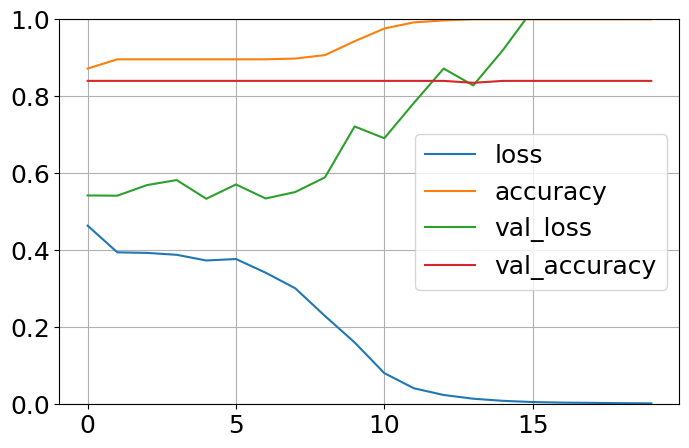

In [56]:
#20 epochs

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=20,
                    validation_data=(X_test_small, y_test_small))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

model.evaluate(X_test_small, y_test_small)

Definitely overfitting. Look at that val_loss.

In fact, after inspecting the val_loss for all trials thus far, it appears that the increase in accuracy that we consistently attained on the 10th epoch was due to overfitting. In many cases, val_loss increased on the 10th epoch. It often increased on the 9th as well.

As such, I'll restrict to 8 epochs for the remainder of this project.

Epoch 1/8
32/32 [==============================] - 5s 142ms/step - loss: 0.4862 - accuracy: 0.8650 - val_loss: 0.5483 - val_accuracy: 0.8400
Epoch 2/8
32/32 [==============================] - 5s 163ms/step - loss: 0.4012 - accuracy: 0.8960 - val_loss: 0.5603 - val_accuracy: 0.8400
Epoch 3/8
32/32 [==============================] - 5s 160ms/step - loss: 0.4096 - accuracy: 0.8960 - val_loss: 0.5825 - val_accuracy: 0.8400
Epoch 4/8
32/32 [==============================] - 5s 164ms/step - loss: 0.3894 - accuracy: 0.8960 - val_loss: 0.5440 - val_accuracy: 0.8400
Epoch 5/8
32/32 [==============================] - 6s 174ms/step - loss: 0.3792 - accuracy: 0.8960 - val_loss: 0.5461 - val_accuracy: 0.8400
Epoch 6/8
32/32 [==============================] - 5s 167ms/step - loss: 0.3771 - accuracy: 0.8960 - val_loss: 0.5560 - val_accuracy: 0.8400
Epoch 7/8
32/32 [==============================] - 5s 162ms/step - loss: 0.3749 - accuracy: 0.8960 - val_loss: 0.5783 - val_accuracy: 0.8400
Epoch 8/8
7/7

[0.5523437261581421, 0.8399999737739563]

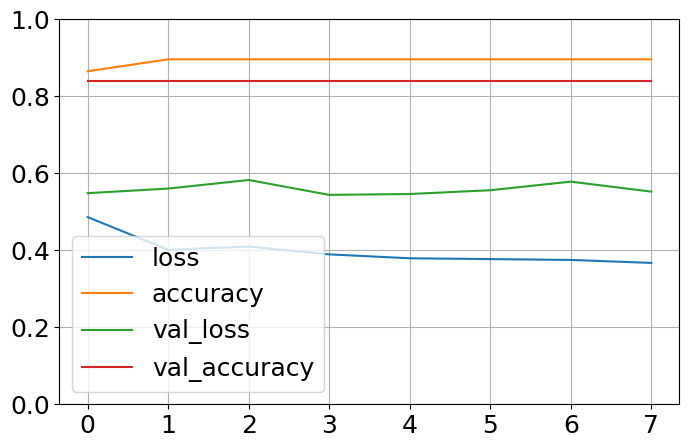

In [58]:
#8 epochs
#change activation function on the output layer to sigmoid, doesn't really make a difference

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=8,
                    validation_data=(X_test_small, y_test_small))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

model.evaluate(X_test_small, y_test_small)

Epoch 1/8
32/32 [==============================] - 6s 173ms/step - loss: 0.4591 - accuracy: 0.8710 - val_loss: 0.7312 - val_accuracy: 0.8400
Epoch 2/8
32/32 [==============================] - 6s 182ms/step - loss: 0.3997 - accuracy: 0.8960 - val_loss: 0.5446 - val_accuracy: 0.8400
Epoch 3/8
32/32 [==============================] - 6s 186ms/step - loss: 0.3570 - accuracy: 0.8960 - val_loss: 0.6151 - val_accuracy: 0.8400
Epoch 4/8
32/32 [==============================] - 6s 174ms/step - loss: 0.3301 - accuracy: 0.8960 - val_loss: 0.5791 - val_accuracy: 0.8400
Epoch 5/8
32/32 [==============================] - 6s 185ms/step - loss: 0.2740 - accuracy: 0.8980 - val_loss: 0.5620 - val_accuracy: 0.8400
Epoch 6/8
32/32 [==============================] - 6s 193ms/step - loss: 0.1954 - accuracy: 0.9220 - val_loss: 0.7367 - val_accuracy: 0.8400
Epoch 7/8
32/32 [==============================] - 6s 172ms/step - loss: 0.0978 - accuracy: 0.9710 - val_loss: 0.6509 - val_accuracy: 0.8400
Epoch 8/8
7/7

[0.6773374676704407, 0.8399999737739563]

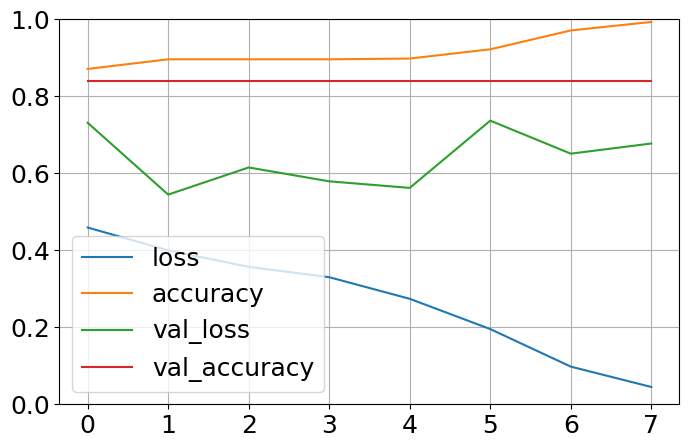

In [60]:
#change activation in the convolution layers
#doesn't make a difference in accuracy, but val_loss increased towards the end so I'll stick with relu after this trial

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='tanh', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='tanh', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=8,
                    validation_data=(X_test_small, y_test_small))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

model.evaluate(X_test_small, y_test_small)

Introduce callbacks. It seems like validation loss is the parameter we should be monitoring since it is the most erratic.

Epoch 1/8
32/32 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.8680
Epoch 1: val_loss improved from inf to 0.54393, saving model to best_model.h5
32/32 [==============================] - 6s 157ms/step - loss: 0.5060 - accuracy: 0.8680 - val_loss: 0.5439 - val_accuracy: 0.8400
Epoch 2/8
32/32 [==============================] - ETA: 0s - loss: 0.4033 - accuracy: 0.8960
Epoch 2: val_loss did not improve from 0.54393
32/32 [==============================] - 5s 162ms/step - loss: 0.4033 - accuracy: 0.8960 - val_loss: 0.5648 - val_accuracy: 0.8400
Epoch 3/8
32/32 [==============================] - ETA: 0s - loss: 0.3867 - accuracy: 0.8960
Epoch 3: val_loss did not improve from 0.54393
32/32 [==============================] - 6s 180ms/step - loss: 0.3867 - accuracy: 0.8960 - val_loss: 0.5445 - val_accuracy: 0.8400
Epoch 4/8
32/32 [==============================] - ETA: 0s - loss: 0.3918 - accuracy: 0.8960
Epoch 4: val_loss did not improve from 0.54393
32/32 [=========

[0.5971827507019043, 0.8399999737739563]

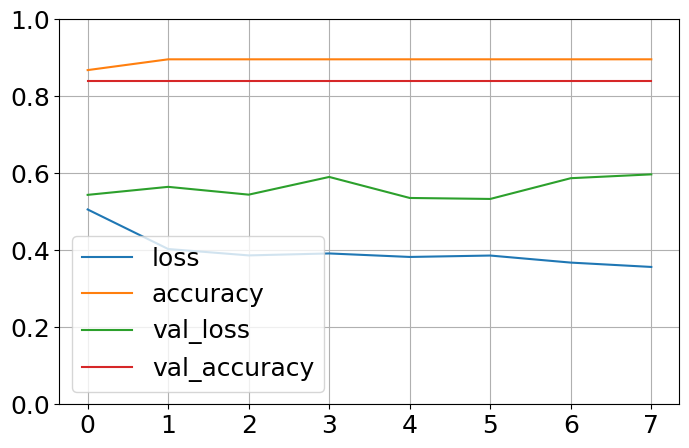

In [76]:
#model checkpoint, monitoring validation loss

from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode = 'min')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=8,
                    validation_data=(X_test_small, y_test_small), callbacks = model_checkpoint)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

model.evaluate(X_test_small, y_test_small)

Epoch 1/8
31/32 [============================>.] - ETA: 0s - loss: 0.4502 - accuracy: 0.8810
Epoch 1: val_loss improved from inf to 0.60350, saving model to best_model.h5
32/32 [==============================] - 6s 169ms/step - loss: 0.4500 - accuracy: 0.8810 - val_loss: 0.6035 - val_accuracy: 0.8400
Epoch 2/8
32/32 [==============================] - ETA: 0s - loss: 0.3978 - accuracy: 0.8960
Epoch 2: val_loss improved from 0.60350 to 0.53946, saving model to best_model.h5
32/32 [==============================] - 6s 181ms/step - loss: 0.3978 - accuracy: 0.8960 - val_loss: 0.5395 - val_accuracy: 0.8400
Epoch 3/8
32/32 [==============================] - ETA: 0s - loss: 0.3895 - accuracy: 0.8960
Epoch 3: val_loss did not improve from 0.53946
32/32 [==============================] - 7s 205ms/step - loss: 0.3895 - accuracy: 0.8960 - val_loss: 0.5845 - val_accuracy: 0.8400
Epoch 4/8
32/32 [==============================] - ETA: 0s - loss: 0.3822 - accuracy: 0.8960
Epoch 4: val_loss improved f

[0.5496532917022705, 0.8399999737739563]

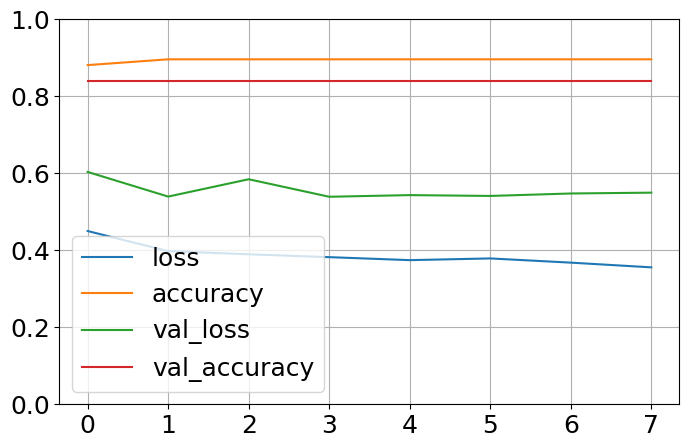

In [77]:
#add a dropout layer

from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode = 'min')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=8,
                    validation_data=(X_test_small, y_test_small), callbacks = model_checkpoint)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

model.evaluate(X_test_small, y_test_small)

Epoch 1/8
32/32 [==============================] - ETA: 0s - loss: 0.5024 - accuracy: 0.8710
Epoch 1: val_loss improved from inf to 0.55594, saving model to best_model.h5
32/32 [==============================] - 10s 304ms/step - loss: 0.5024 - accuracy: 0.8710 - val_loss: 0.5559 - val_accuracy: 0.8400
Epoch 2/8
32/32 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.8960
Epoch 2: val_loss did not improve from 0.55594
32/32 [==============================] - 10s 324ms/step - loss: 0.3907 - accuracy: 0.8960 - val_loss: 0.5661 - val_accuracy: 0.8400
Epoch 3/8
32/32 [==============================] - ETA: 0s - loss: 0.4006 - accuracy: 0.8960
Epoch 3: val_loss did not improve from 0.55594
32/32 [==============================] - 10s 310ms/step - loss: 0.4006 - accuracy: 0.8960 - val_loss: 0.5827 - val_accuracy: 0.8400
Epoch 4/8
32/32 [==============================] - ETA: 0s - loss: 0.3919 - accuracy: 0.8960
Epoch 4: val_loss improved from 0.55594 to 0.53775, saving m

[0.579088032245636, 0.8399999737739563]

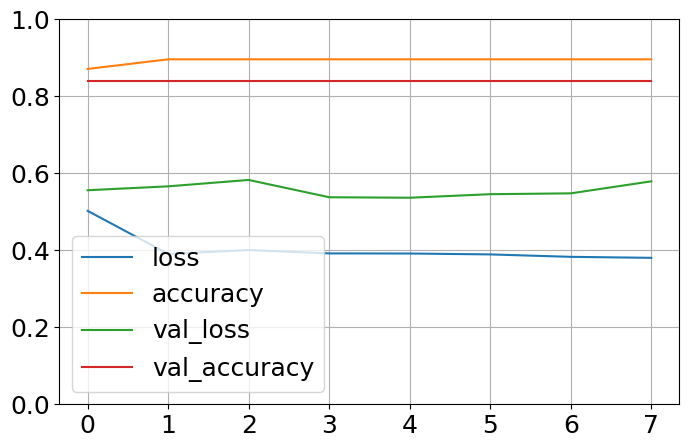

In [78]:
#add another convolution layer

model_checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode = 'min')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=8,
                    validation_data=(X_test_small, y_test_small), callbacks = model_checkpoint)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

model.evaluate(X_test_small, y_test_small)

The model checkpoint callback isn't really helping us. Other callbacks, like early stopping or reduce learning wouldn't be much help either since we're only training on 8 epochs. 

Epoch 1/8
63/63 [==============================] - ETA: 0s - loss: 0.4349 - accuracy: 0.8810
Epoch 1: val_loss improved from inf to 0.56566, saving model to best_model.h5
63/63 [==============================] - 11s 159ms/step - loss: 0.4349 - accuracy: 0.8810 - val_loss: 0.5657 - val_accuracy: 0.8400
Epoch 2/8
63/63 [==============================] - ETA: 0s - loss: 0.4086 - accuracy: 0.8960
Epoch 2: val_loss improved from 0.56566 to 0.53844, saving model to best_model.h5
63/63 [==============================] - 11s 179ms/step - loss: 0.4086 - accuracy: 0.8960 - val_loss: 0.5384 - val_accuracy: 0.8400
Epoch 3/8
63/63 [==============================] - ETA: 0s - loss: 0.3953 - accuracy: 0.8960
Epoch 3: val_loss did not improve from 0.53844
63/63 [==============================] - 11s 179ms/step - loss: 0.3953 - accuracy: 0.8960 - val_loss: 0.5712 - val_accuracy: 0.8400
Epoch 4/8
63/63 [==============================] - ETA: 0s - loss: 0.3945 - accuracy: 0.8960
Epoch 4: val_loss did not

[0.5320152044296265, 0.8399999737739563]

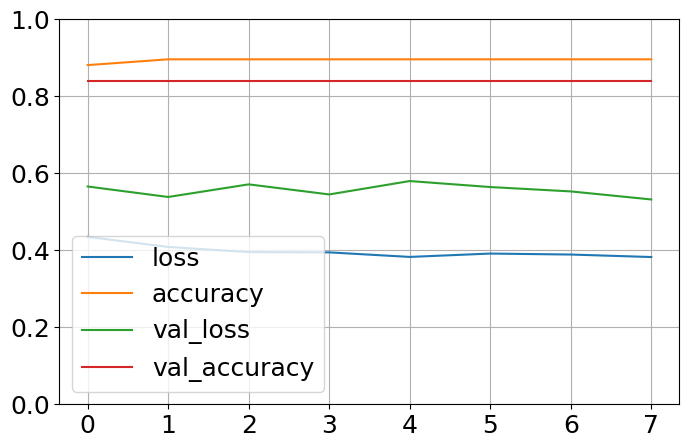

In [79]:
#change the batch size, which is currently 32

model_checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode = 'min')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4576, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_small, y_train_small, epochs=8, batch_size = 16,
                    validation_data=(X_test_small, y_test_small), callbacks = model_checkpoint)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

model.evaluate(X_test_small, y_test_small)

In conclusion, this data set continues to be stubborn, throwing out 84% validation accuracy no matter what we do to the model. However, this is much much better than the results from the previous lab. It is clear (and in hindsight, obvious) that a convolution neural network, designed for image classification is better than the ANN's of Lab 4.